# Modelos de Predição

In [1]:
import pandas as pd
import numpy as np

insights_data = pd.read_csv('insights-data.csv')

## separa dados e classe

In [2]:
labels = insights_data["insigths"].values
insights_columns = insights_data.select_dtypes(include=['float64','int64']).columns.drop('insigths')
features = insights_data[list(insights_columns)].values
features.shape

(330, 32)

## define rotina de testes

In [3]:
from scipy.stats import spearmanr
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import make_scorer
from sklearn.feature_selection import SelectKBest, f_regression

def simple_spearman(x,y): return np.abs(spearmanr(x,y)[0])
spearmanr_scorer = make_scorer(simple_spearman)

def cv4kBest(model, feats, labs, cvOpt, loops):
    result_list = []
    for i in range(1, loops+1):
        kbest_features = SelectKBest(f_regression, k=i).fit_transform(feats, labs)
        scores = cross_val_score(model, kbest_features, labels, cv=cvOpt, scoring=spearmanr_scorer)
        result_list.append(scores.mean())
        
    return result_list

## executa teste sobre modelos regressão

In [4]:
linear_model = LinearRegression()
spearmanr_scores_linear = cv4kBest(linear_model, features, labels, 10, 20)

In [5]:
linearSVR_model = LinearSVR(epsilon=0.01)
spearmanr_scores_svrLinear = cv4kBest(linearSVR_model, features, labels, 10, 20)

In [6]:
svr_model = SVR(C=1.0, epsilon=0.01, kernel='rbf')
spearmanr_scores_svr = cv4kBest(svr_model, features, labels, 10, 20)

## mostra resultados

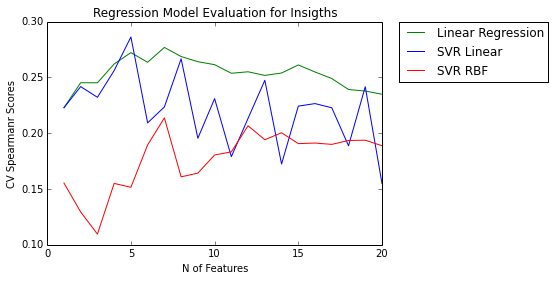

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()

n_features = range(1, 21)

plt.plot(n_features, spearmanr_scores_linear, 'g', label='Linear Regression')
plt.plot(n_features, spearmanr_scores_svrLinear, 'b', label='SVR Linear')
plt.plot(n_features, spearmanr_scores_svr, 'r', label='SVR RBF')
plt.xlabel('N of Features')
plt.ylabel('CV Spearmanr Scores')
plt.legend(loc='lower left')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Regression Model Evaluation for Insigths')
plt.show()

## executa modelos de decisão

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
scores_gnb = cv4kBest(gnb_model, features, labels, 10, 20)

In [14]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
scores_mnb = cv4kBest(mnb_model, features, labels, 10, 20)

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=0)
scores_tree = cv4kBest(tree_model, features, labels, 10, 20)

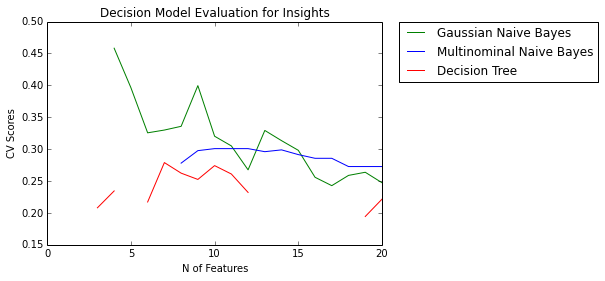

In [16]:
plt.figure()

n_features = range(1, 21)

plt.plot(n_features, scores_gnb, 'g', label='Gaussian Naive Bayes')
plt.plot(n_features, scores_mnb, 'b', label='Multinominal Naive Bayes')
plt.plot(n_features, scores_tree, 'r', label='Decision Tree')
plt.xlabel('N of Features')
plt.ylabel('CV Scores')
plt.legend(loc='lower left')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Decision Model Evaluation for Insights')
plt.show()